#### Load Packages

In [39]:
# import required packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller

import warnings
warnings.filterwarnings('ignore')

#### Load Datasets

In [40]:
df = pd.read_csv(r"C:\Users\Sree\Downloads\MSFT.csv")
df.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-31,233.759995,234.919998,231.149994,232.130005,229.908890,28357300
1,2022-11-01,234.600006,235.740005,227.330002,228.169998,225.986771,30592300
2,2022-11-02,229.460007,231.300003,220.039993,220.100006,217.994003,38407000


#### To datetime and set index

In [41]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace = True)

In [42]:
df = df[['High','Close']]

#### Stationary Checking

In [43]:
# H0: It is non stationary
# H1: It is stationary

def adf_test(data):
    result = adfuller(data)
    labels = ['ADF Test Statistic','p-value','Lags used','Number of Observation Used']
    for value,label in zip(result,labels):
        print(label+ ' : '+str(value))
    if result[1]>=0.05:
        print('data is non-stationary')
    else:
        print("data is stationary")
        
print('Column : High')   
adf_test(df['High'])
print('cloumn : Close')
adf_test(df['Close'])

Column : High
ADF Test Statistic : -1.2071204989989917
p-value : 0.670525176859577
Lags used : 0
Number of Observation Used : 250
data is non-stationary
cloumn : Close
ADF Test Statistic : -1.4175043033962096
p-value : 0.5738561643647346
Lags used : 2
Number of Observation Used : 248
data is non-stationary


#### Model

In [44]:
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
model = VAR(df)
results = model.fit(5)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 17, Nov, 2023
Time:                     22:24:41
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    5.02661
Nobs:                     246.000    HQIC:                   4.83935
Log likelihood:          -1255.83    FPE:                    111.413
AIC:                      4.71313    Det(Omega_mle):         102.080
--------------------------------------------------------------------
Results for equation High
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const            3.367694         2.010338            1.675           0.094
L1.High          0.151817         0.128133            1.185           0.236
L1.Close         0.871368         0.108499            8.031           0.000
L2.Hi

#### Prediction

In [33]:
 #Make predictions
lag_order = 5
forecast_period = 10  # You can adjust the forecast period as needed

# Forecast the next 'forecast_period' time steps
forecast_values = results.forecast(df.values[-lag_order:], steps=forecast_period)

#### Plot

In [37]:
# Convert the forecasted values to a DataFrame for easy handling
forecast_df = pd.DataFrame(forecast_values, columns=df.columns)
# Print the forecasted values
print("Forecasted values:")
print(forecast_df)

Forecasted values:
         High       Close
0  341.815331  338.133343
1  339.925867  335.626935
2  337.649301  332.161633
3  335.945596  331.764990
4  336.045516  333.098105
5  336.462208  333.287228
6  336.198040  332.668261
7  335.706344  331.937298
8  335.403666  331.875909
9  335.497082  332.243382


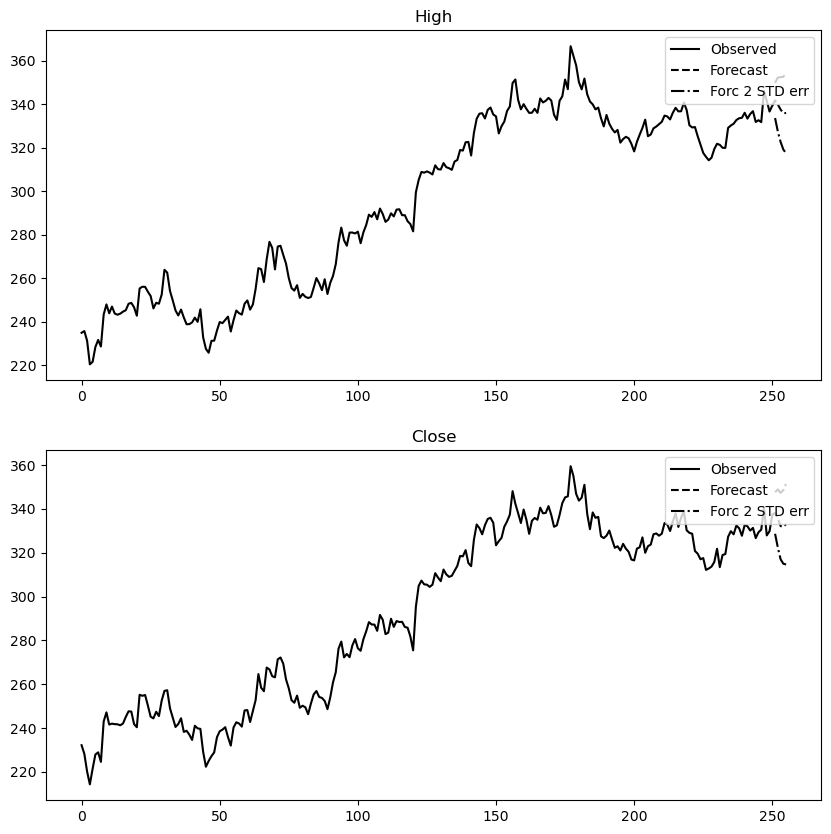

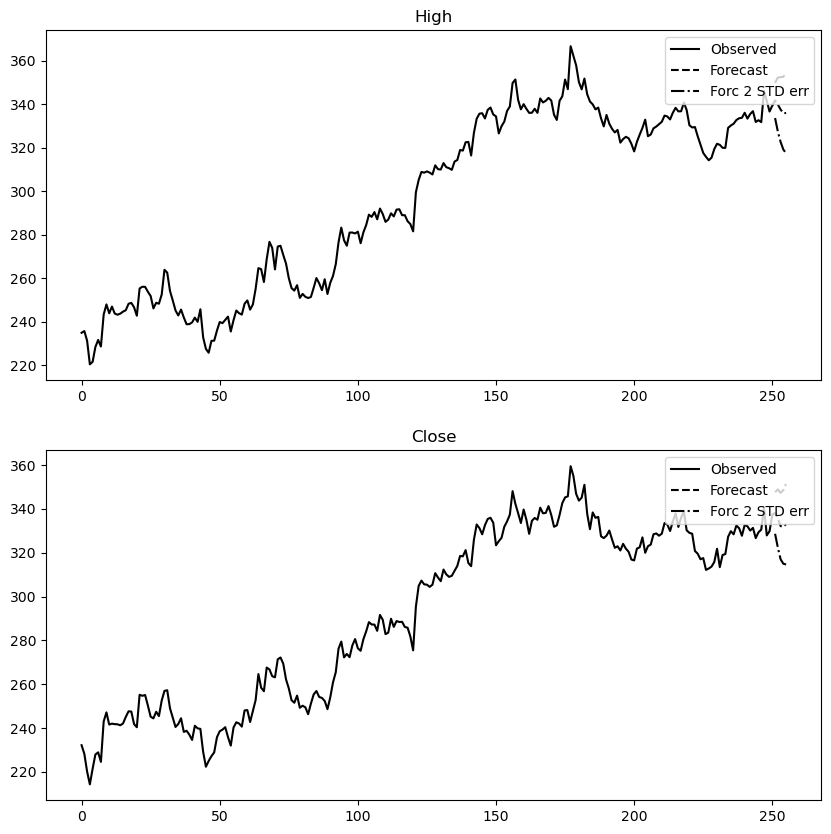

In [38]:
results.plot_forecast(5)